___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Guilherme Leite

## Gabriel Brey

## Leonardo Neves

___

___

## INTRODUÇÃO

A indústria cinematográfica é umas das maiores do mercado de entretenimento, movimentando bilhões de dólares anualmente,e com isso gera um grande risco financeiro, com alguns filmes recentes com orçamentos de até 400 milhões de dólares.
Esse risco poderia ser redusido até certo ponto com o uso de um modelo quantitativo.

O objetivo do projeto é estimar o rendimento de um filme em relação a época do ano que é lançado e seu orçamento, assim tendo o intuito de fazer um modelo de predição com variaveis que geralemnte ja são conhecidas antes da estreia do filme.

A base de dados contém informações de aproximadamente 5000 filmes do site TMDB, que concentra vários dados sobre a produção, gênero, entre outros de peças cinematográficas.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados que serão utilizados serão o revenue, budget e release date. O revenue se refere a quanto o filme faturou em todo o mundo em dólares americanos, o budget é referente ao orçamento do filme, também em dólares americanos e o release date é a data de lançamento mundial no formato dia/mês/ano

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Desktop\Insper\2018\DPCD\DPCD\Projeto3


### BASE DE DADOS

In [3]:
tmdb = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')#Abre o dataframe inteiro

data = tmdb[['revenue','budget','release_date']]#Separa as colunas
data = data[~(data == 0).any(axis=1)] #remove filmes que tenham, algum dos dados igual a 0
nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df
nndf = nndf.reset_index(drop=True)#Reseta o index dos filmes

In [4]:
for i in range (len(nndf)): #Deixa a data de lançamento como só o mes envez de DD/MM/YYYY
    Str = str(nndf.release_date[i])	
    SStr = Str.split('-')
    nndf.release_date[i] = SStr[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### ANÁLISE DESCRITIVA

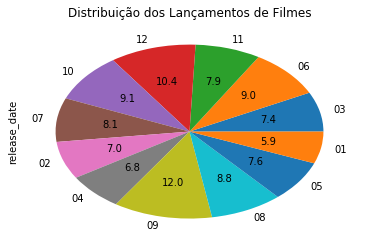

In [5]:
ut15 = (nndf.release_date.value_counts(sort=False, normalize=True)*100)
a4_dims = (10, 6)
plot = ut15.plot(kind='pie',title = "Distribuição dos Lançamentos de Filmes",autopct='%.1f')

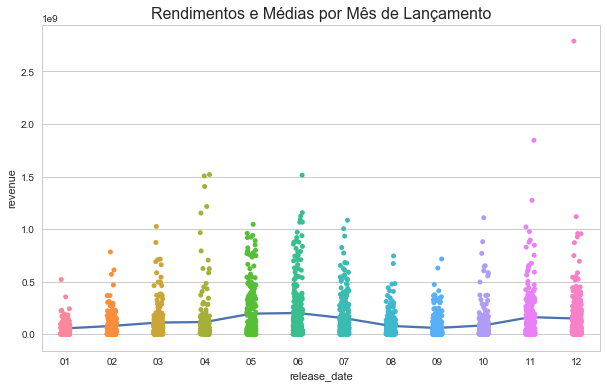

In [6]:
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Rendimentos e Médias por Mês de Lançamento', fontsize=16)
sns.set_context("talk")
sns.stripplot(x="release_date", y="revenue", data=nndf, jitter=True);

X2  = ['01','02','03','04','05','06','07','08','09','10','11','12',]#ordena os meses
#média de cada mês
Y2 = [nndf.loc[nndf['release_date'] == '01'].mean()[0],nndf.loc[nndf['release_date'] == '02'].mean()[0],
nndf.loc[nndf['release_date'] == '03'].mean()[0],nndf.loc[nndf['release_date'] == '04'].mean()[0],
nndf.loc[nndf['release_date'] == '05'].mean()[0],nndf.loc[nndf['release_date'] == '06'].mean()[0],
nndf.loc[nndf['release_date'] == '07'].mean()[0],nndf.loc[nndf['release_date'] == '08'].mean()[0],
nndf.loc[nndf['release_date'] == '09'].mean()[0],nndf.loc[nndf['release_date'] == '10'].mean()[0],
nndf.loc[nndf['release_date'] == '11'].mean()[0],nndf.loc[nndf['release_date'] == '12'].mean()[0]]
plt.plot(X2,Y2)

plt.show() 

Os gráficos acima mostram como o revenue dos filmes ocorre nos meses do ano, é possível perceber que os meses de Maio, Junho , Julho, Novembro tem um maior rendimento médio, enquanto Janeiro e Setembro tem rendimento menor.

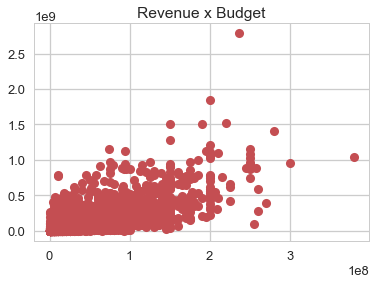

In [7]:
plt.plot(nndf['budget'],nndf['revenue'],'ro')
plt.title('Revenue x Budget')
plt.show()

Como é possível perber pelo gráfico, existe algum tipo de relação linear entre o Budget e o Revenue dos filmes

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

In [8]:
x = len (nndf)
nndf.sample(frac=1)# Aleatoriza o index de cada filme
DfTrain = nndf.iloc[:int(0.75*x)]# separa os filmes de 75% primeiros filmes como Treinamento
DfTrain = DfTrain.reset_index(drop=True)#Reseta o index dos filmes
DfTest = nndf.iloc[int(0.75*x):]# separa os filmes de 25% últimos filmes como Teste
DfTest = DfTest.reset_index(drop=True)#Reseta o index dos filmes

print("Valores para o dataframe de treinamento\n",DfTrain.describe())
print("\nValores para o dataframe de teste\n",DfTest.describe())

Valores para o dataframe de treinamento
             revenue        budget
count  2.421000e+03  2.421000e+03
mean   1.517634e+08  5.243642e+07
std    2.039237e+08  4.542646e+07
min    1.100000e+01  1.100000e+01
25%    3.264555e+07  2.000000e+07
50%    8.325823e+07  3.700000e+07
75%    1.810000e+08  6.900000e+07
max    2.787965e+09  3.800000e+08

Valores para o dataframe de teste
             revenue        budget
count  8.080000e+02  8.080000e+02
mean   2.979493e+07  5.352265e+06
std    5.444615e+07  5.649416e+06
min    5.000000e+00  1.000000e+00
25%    3.138176e+06  2.000000e+06
50%    1.161523e+07  4.619392e+06
75%    3.257273e+07  7.500000e+06
max    7.929106e+08  8.600000e+07


As médias e desvios padrão para ambos os dataframes são muito próximos, dessa forma, é possível dizer que ambos tem as mesmas características e serão menos suscetíveis a overfitting e underfitting.  

In [9]:
import numpy as np
import statsmodels.api as sm

X = DfTrain[['release_date','budget']].round(0).astype(int)
X = X.values.reshape((len(X),2))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest[['release_date','budget']].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),2))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


 R-squared , é um numero entre 0 e 1 , ele conta como a sua linha se encaixa no data set, assim podemos dizer que o R-squared retorna o valor até certo ponto em que a variavel-x pode ser usada para predizer os valores da variavel Y.
No caso do nosso modelo , o R2 nos conta o a qualidade da predição do reveneu pelo sua data de lançamento .

Predição pela media 

In [10]:
media = DfTrain.revenue.mean()

S =  (DfTrain.revenue-media)**2
ss = S.sum()
RMS = np.sqrt(ss/len( DfTrain.revenue))

print("Média total: ",media)
print("R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0")
print("RMS da Predição pela media:", RMS)


Média total:  151763406.24287483
R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0
RMS da Predição pela media: 203881540.15191907


MODELO DE REGRESSÃO LINEAR ( ordinary least squares):

In [11]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
Ypredictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     944.3
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          8.52e-304
Time:                        16:20:07   Log-Likelihood:                -49006.
No. Observations:                2421   AIC:                         9.802e+04
Df Residuals:                    2418   BIC:                         9.804e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.083e+06   7.84e+06     -1.159      0.247   -2.44e+07    6.28e+06
x1          9.295e+05   8.99e+05      1.034      0.301   -8.33e+05    2.69e+06
x2             2.9088      0.067     43.440      0.000       2.778       3.040
==============================================================================
Omnibus:                      825.411   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77721.909
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                      30.728   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
ybar = Ypredictions.mean()
S =  (Ypredictions-ybar)**2
ss = S.sum()
RMSTrain = np.sqrt(ss/len( Ypredictions))

print("RMS do Treinamento:",RMSTrain)

RMS do Treinamento: 132163140.33243366


In [13]:
XTest = sm.add_constant(XTest)
YTestpredictions = model.predict(XTest) # cria um array com as predições para a base de teste com o 
                                        # modelo da base de treinamento

In [14]:
media = DfTest.revenue.mean()
S = (YTestpredictions-media)**2 
ss = S.sum()
RMSTest = np.sqrt(ss/len( DfTrain.revenue))
print("RMS do Teste:",RMSTest)

RMS do Teste: 13763905.561378207


In [15]:
y = DfTest['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = YTestpredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2Test = 1-( ssreg / sstot)
print("R2 do Teste: ",r2Test)

R2 do Teste:  -0.10425604876620587


In [16]:
RMSTrain/RMSTest

9.602153962991874

Regressão sem o Release Date:

In [17]:
X = DfTrain['budget'].round(0).astype(int)
X = X.values.reshape((len(X),1))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest['budget'].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),1))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

In [18]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
Ypredictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1887.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          2.67e-305
Time:                        16:20:08   Log-Likelihood:                -49007.
No. Observations:                2421   AIC:                         9.802e+04
Df Residuals:                    2419   BIC:                         9.803e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.557e+06   4.65e+06     -0.550      0.582   -1.17e+07    6.55e+06
x1             2.9092      0.067     43.445      0.000       2.778       3.040
==============================================================================
Omnibus:                      826.899   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76743.194
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                      30.552   Cond. No.                     1.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
ybar = Ypredictions.mean()
S =  (Ypredictions-ybar)**2
ss = S.sum()
RMSTrain = np.sqrt(ss/len( Ypredictions))

print("RMS do Treinamento:",RMSTrain)

RMS do Treinamento: 132125730.77339067


In [20]:
XTest = sm.add_constant(XTest)
YTestpredictions = model.predict(XTest) # cria um array com as predições para a base de teste com o 
                                        # modelo da base de treinamento

In [21]:
media = DfTest.revenue.mean()
S = (YTestpredictions-media)**2 
ss = S.sum()
RMSTest = np.sqrt(ss/len( DfTrain.revenue))
print("RMS do Teste:",RMSTest)

RMS do Teste: 13565467.38824605


In [22]:
y = DfTest['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = YTestpredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2Test = 1-( ssreg / sstot)
print("R2 do Teste: ",r2Test)

R2 do Teste:  -0.10291053846314546


In [25]:
RMSTrain/RMSTest

9.73985834707564

In [23]:
y = DfTrain['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = Ypredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2=1-( ssreg / sstot)
r2

0.438287264996697

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS

https://www.kaggle.com/tmdb/tmdb-movie-metadata - Acessado em 25/05/2018

https://www.themoviedb.org/?language=en - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html - 
Acessado em 28/05/2018

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/  - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate - Acessado em 27/05/2018